# Capstone Project - Telco Churn Prediction

In [88]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

In [2]:
file_location = './customer-churn-prediction-2020/train.csv'

In [3]:
# read the data into pandas
df_train = pd.read_csv(file_location)

In [4]:
#inspect the dataset
df_train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [6]:
# check for missing data
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
# check for correct data types for all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [11]:
# convert the target label 'churn' to 1 and 0 
df_train['churn'] = df_train['churn'].map(lambda x: 1 if x == 'yes'
                                          else 0)

In [50]:
# checking if the above conversion was successful
df_train[df_train.churn == 1].tail()

state  account_length      area_code  international_plan  \
4203    NH             114  area_code_510                   1   
4208    ME              90  area_code_415                   0   
4213    NM             137  area_code_408                   1   
4243    ND             140  area_code_510                   0   
4244    AZ              97  area_code_510                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
4203                1                     28              136.4   
4208                0                      0              104.0   
4213                0                      0              312.4   
4243                0                      0              244.7   
4244                0                      0              252.6   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
4203               93             23.19              170.0               90   
4208              104             17.68              170.9              106   
4213              110             53.11              231.1               73   
4243              115             41.60              258.6              101   
4244               89             42.94              340.3               91   

      total_eve_charge  total_night_minutes  total_night_calls  \
4203             14.45                191.5                 73   
4208             14.53                158.8                 99   
4213             19.64                120.1                 78   
4243             21.98                231.3                112   
4244             28.93                256.5                 67   

      total_night_charge  total_intl_minutes  total_intl_calls  \
4203                8.62                14.6                 4   
4208                7.15                 8.7                 5   
4213                5.40                10.6                 2   
4243               10.41                 7.5                 6   
4244               11.54                 8.8                 5   

      total_intl_charge  number_customer_service_calls  churn  
4203               3.94                              2      1  
4208               2.35                              4      1  
4213               2.86                              1      1  
4243               2.03                              1      1  
4244               2.38                              1      1

In [16]:
# convert international_plan to numerical data type
df_train['international_plan'] = df_train['international_plan'].map(lambda x: 1 if x == 'yes'
                                          else 0)

In [17]:
# convert voice_mail_plan to numerical data type
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map(lambda x: 1 if x == 'yes'
                                          else 0)

In [18]:
df_train.head()

state  account_length      area_code  international_plan  voice_mail_plan  \
0    OH             107  area_code_415                   0                1   
1    NJ             137  area_code_415                   0                0   
2    OH              84  area_code_408                   1                0   
3    OK              75  area_code_415                   1                0   
4    MA             121  area_code_510                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

In [128]:
# finding out which state has the highest churn percentages
num = df_train
df_train.groupby('state').churn.value_counts(normalize = True).sort_values(ascending = False)

state  churn
VA     0        0.950000
HI     0        0.948052
AK     0        0.934426
NE     0        0.931507
RI     0        0.931034
                  ...   
       1        0.068966
NE     1        0.068493
AK     1        0.065574
HI     1        0.051948
VA     1        0.050000
Name: churn, Length: 102, dtype: float64

<AxesSubplot:xlabel='state', ylabel='churn'>

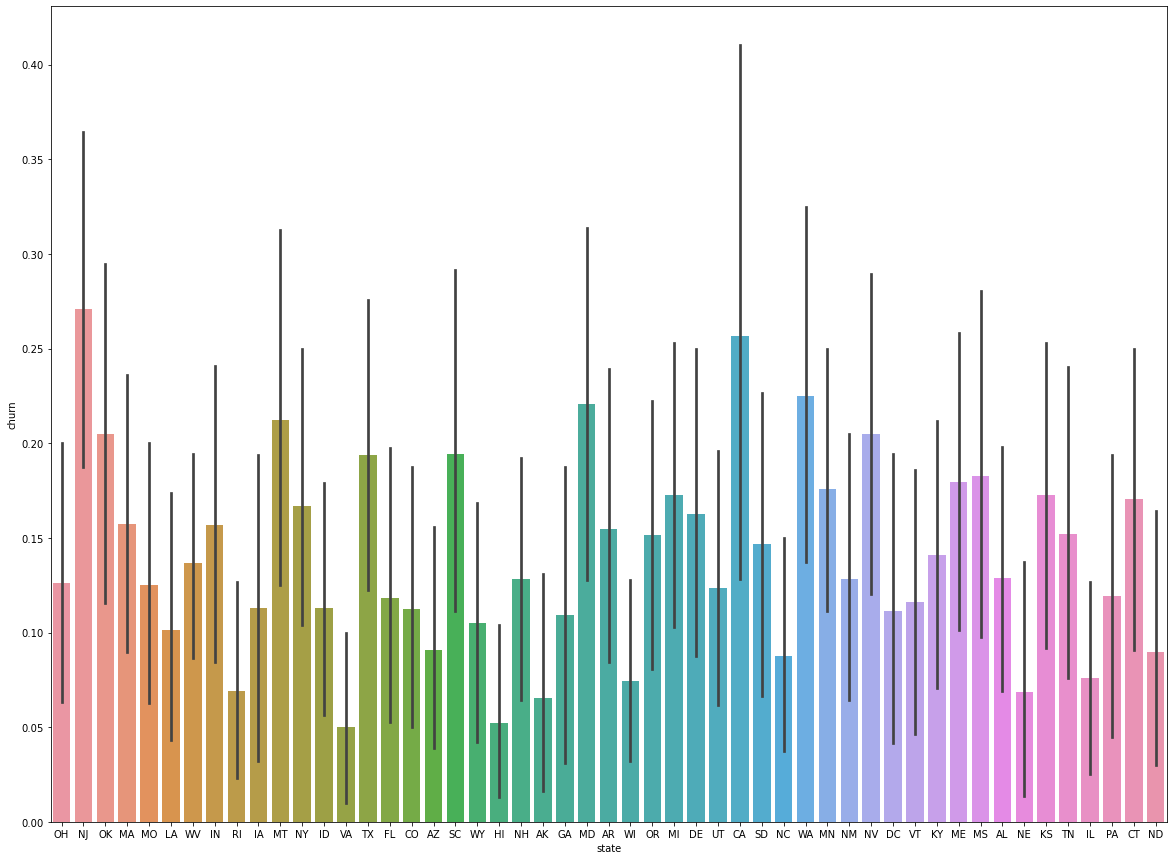

In [34]:
# plotting the above data
plt.figure(figsize = (20,15))
sns.barplot( x= df_train.state, y = df_train.churn)

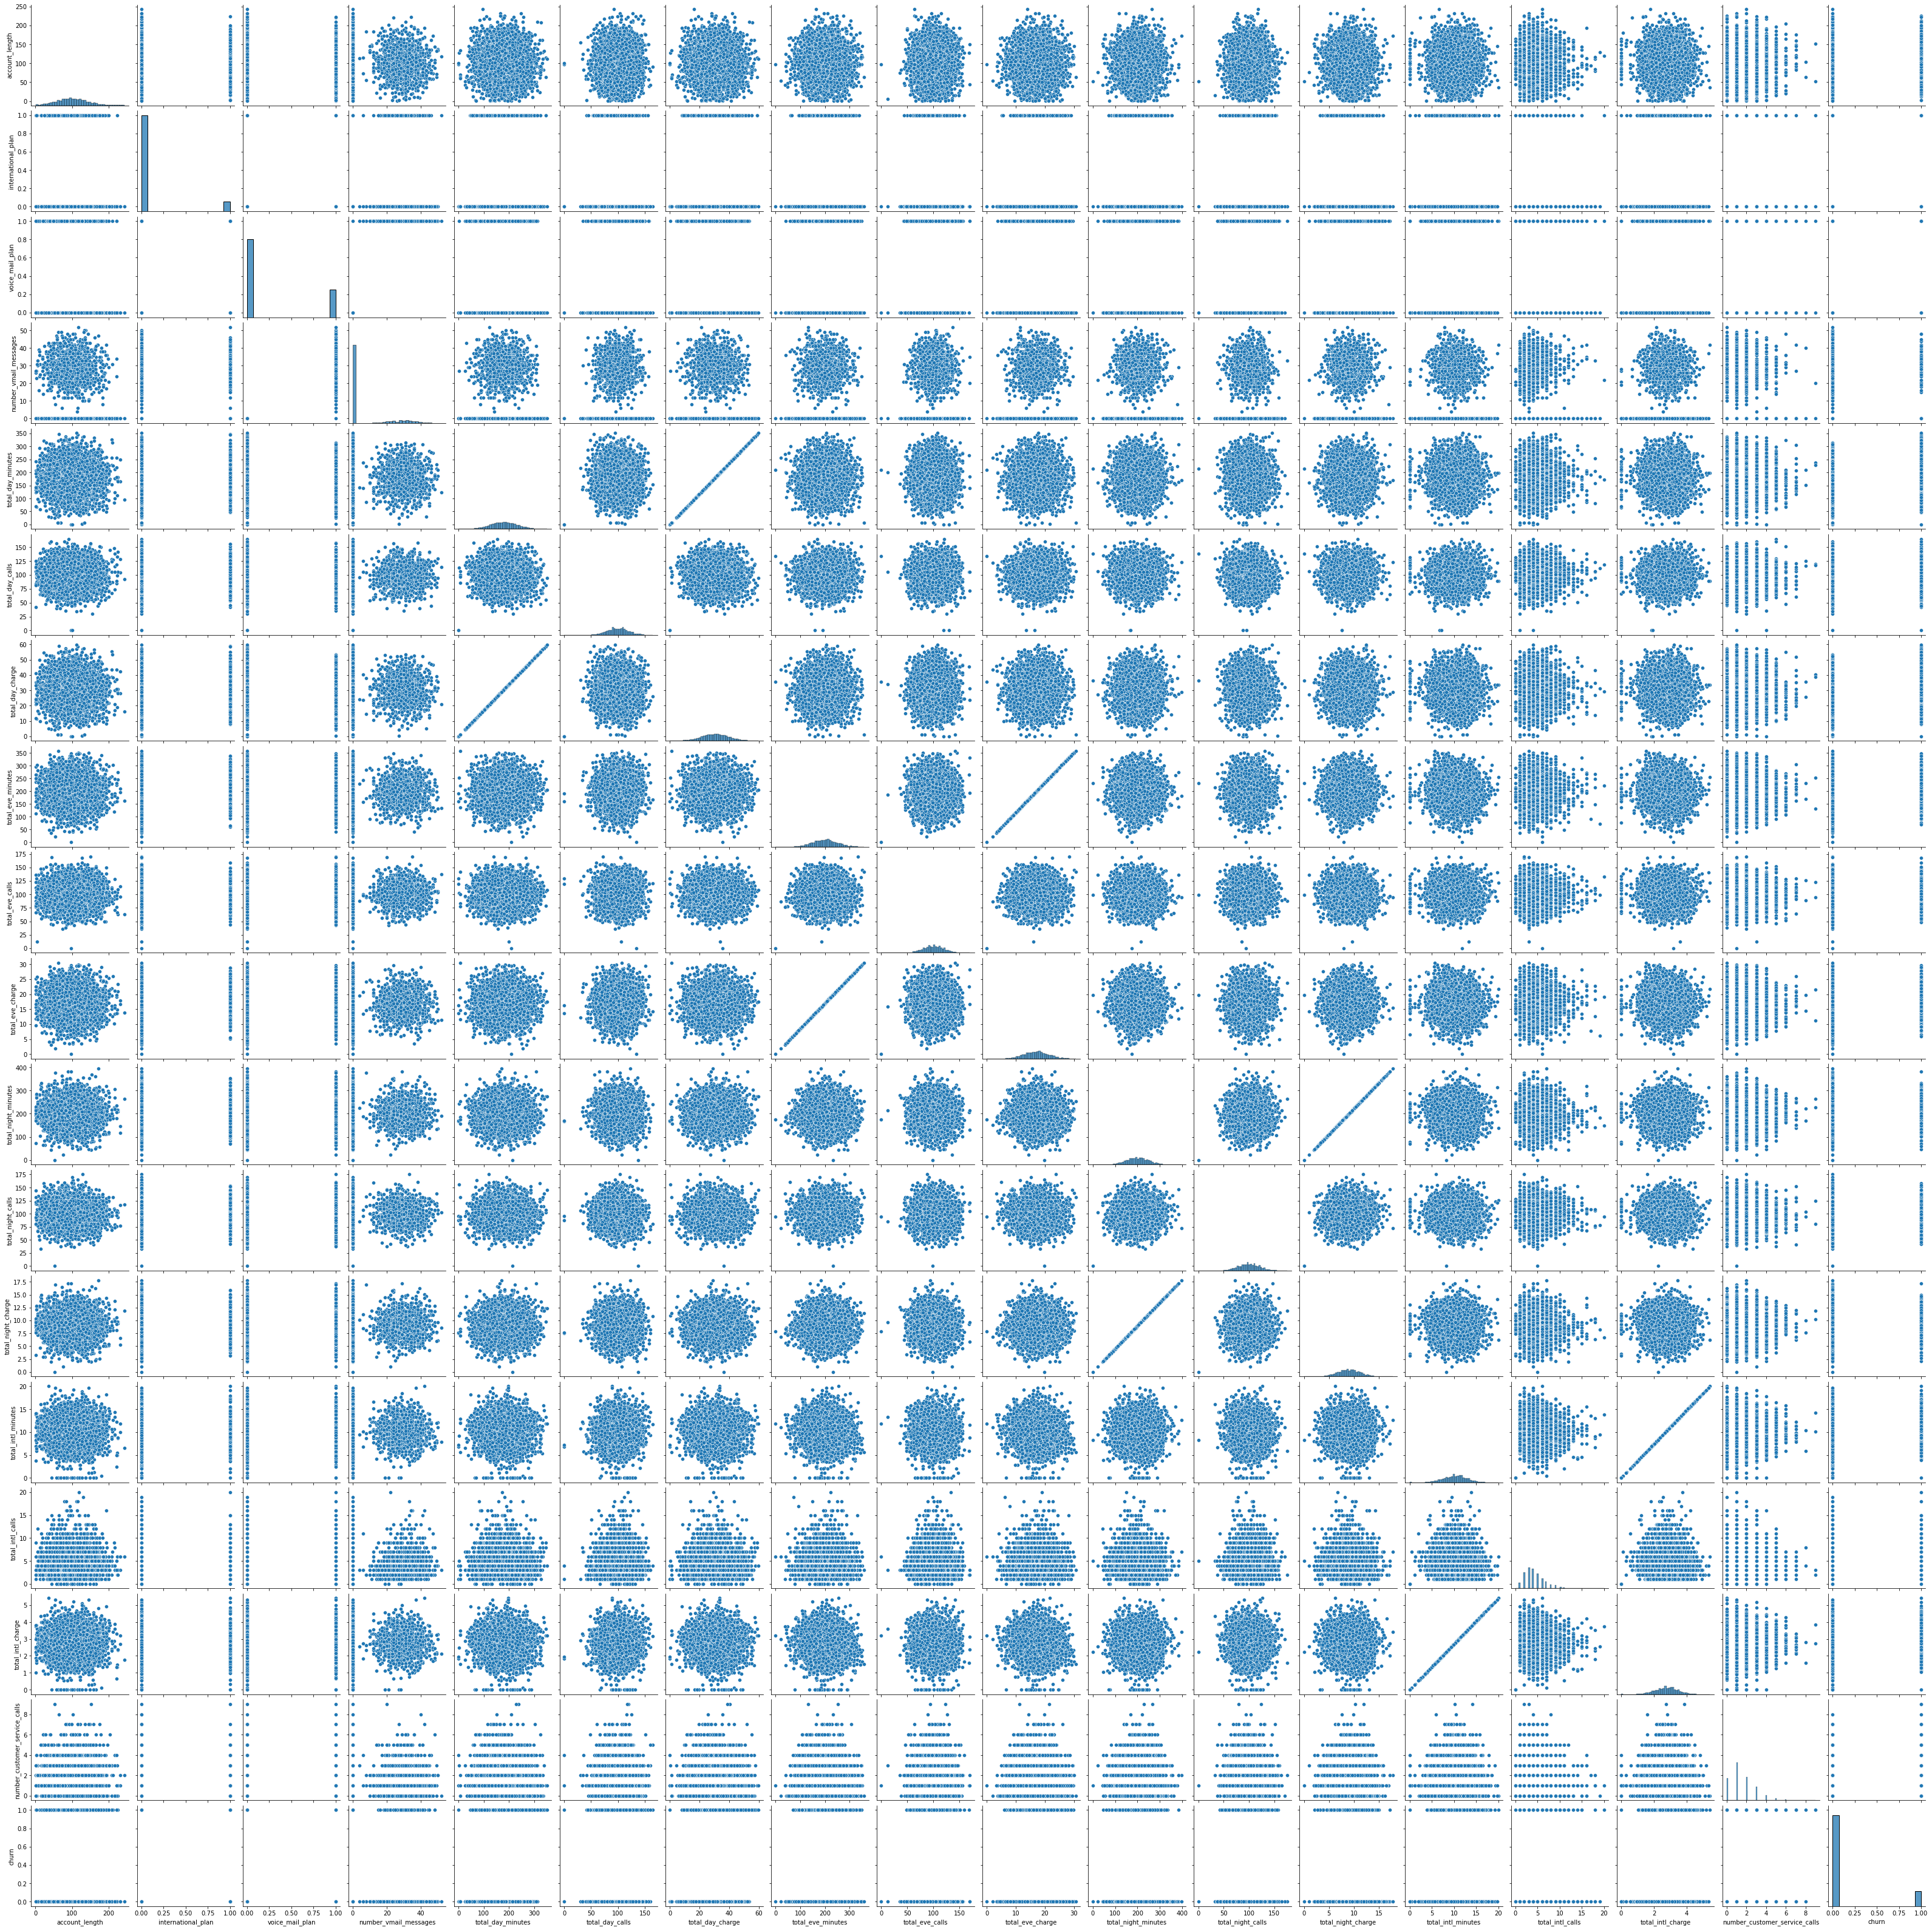

In [35]:
sns.pairplot(df_train)

In [122]:
# checking for imbalanced data
df_train.churn.value_counts(normalize = True)

0    0.859294
1    0.140706
Name: churn, dtype: float64

## Modelling

In [67]:
# define the Xand Y variables
X = df_train.drop(columns = ['churn', 'state','area_code'])
y = df_train.churn

In [68]:
# split the train and the validation set
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.25, 
                                                   stratify = y,
                                                   random_state = 42)

In [69]:
# baseline accuracy
y_test.value_counts(normalize = True)

0    0.85889
1    0.14111
Name: churn, dtype: float64

In [74]:
ss = StandardScaler()

In [75]:
ss.fit(X_train)

StandardScaler()

In [76]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

### Logistic Regression Model

In [114]:
logreg = LogisticRegression(class_weight= 'balanced', max_iter = 1000)

In [115]:
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [116]:
logreg.score(X_train, y_train)

0.7838092249764669

In [117]:
logreg.score(X_test, y_test)

0.748824082784572

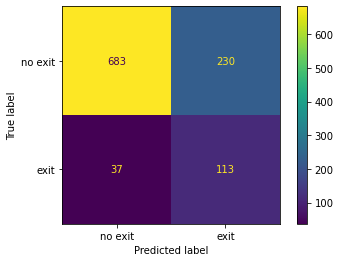

In [118]:
#Plot the confusion matrix
plot_confusion_matrix(logreg, X_test, y_test, values_format = 'd', display_labels = ['no exit','exit'])